Bag of Words + Machine Learning Classifier

**Import Libraries**

In [39]:
### For computational and random seed purpose
import numpy as np
np.random.seed(42)
#to read csv file
import pandas as pd
#To split into train and cv dataxw
from sklearn.model_selection import train_test_split
#To compute AUROC
from sklearn.metrics import auc,roc_auc_score
#for AUROC graph
import matplotlib.pyplot as plt
#for oversampling technique
from imblearn.over_sampling import SMOTE # (https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)
#Data is imbalanced, we need calibrated model
from sklearn.calibration import CalibratedClassifierCV
#for hyperparameter tuning and Cross-validation fold
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RepeatedStratifiedKFold
#to ignore the error message
import warnings
warnings.filterwarnings("ignore")
#for heatmap and other plotting technique
import seaborn as sns
#to strandize the real value data
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
#To create Knn model on datasets
from sklearn.neighbors import KNeighborsClassifier
#for accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
# For applying model on datasets
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

#using simple network
from keras.models import Sequential
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC

In [ ]:
data = pd.read_csv("Modified_SQL_Dataset.csv")

In [ ]:
data.drop_duplicates(inplace=True)
data.head()

,Query,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1


In [ ]:
data.shape

(30907, 2)

In [ ]:
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import string
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
from nltk.stem.porter import PorterStemmer
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import word2vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
#printing some random variable
sent_0 = data['Query'].values[0]
print(sent_0)
print("="*50)

sent_2000 = data['Query'].values[2000]
print(sent_2000)
print("="*50)

sent_15000 = data['Query'].values[15000]
print(sent_15000)
print("="*50)

sent_20000 = data['Query'].values[20000]
print(sent_20000)
print("="*50)

" or pg_sleep  (  __TIME__  )  --
-6073"   )    )     )   or 9502  =  2012#
wilson@autoconstruccion.fi
  SELECT SUBSTR ( "SQL Tutorial", -5, 5 )  AS ExtractString;


In [ ]:
#remove the special Character :  https://stackoverflow.com/a/5843547/4084039
sent_15000 = re.sub('[^A-Za-z0-9]+',' ',sent_15000)
print(sent_15000)

wilson autoconstruccion fi


In [ ]:
sent_20000 = re.sub('[^A-Za-z0-9]+',' ',sent_20000)
print(sent_20000)

 SELECT SUBSTR SQL Tutorial 5 5 AS ExtractString 


In [ ]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [ ]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_query = []
lemmatizer = WordNetLemmatizer()
# tqdm is for printing the status bar
for sentance in tqdm(data['Query'].values):
    sentance = re.sub('[^A-Za-z0-9]+', ' ', sentance)
    sentance = re.sub(r',', ' ', sentance)
    #https://www.machinelearningplus.com/nlp/lemmatization-examples-python/
    tokenization = nltk.word_tokenize(sentance)
    sentance = ' '.join([lemmatizer.lemmatize(w) for w in tokenization])
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_query.append(sentance.strip())

100%|██████████| 30907/30907 [00:07<00:00, 4380.32it/s]


In [ ]:
preprocessed_query

['pg sleep time',
 'create user name identified pass123 temporary tablespace temp default tablespace user',
 '1 utl inaddr get host address select distinct table name select distinct table name rownum limit sys table limit 5',
 'select user id 1 1 1 union select 1 version 1',
 'select user id 1 1 union select 1 version 1',
 'select name syscolumns id select id sysobjects name tablename',
 'select user id 1 1 1 1',
 '1 load file char 47 101 116 99 47 112 97 115 115 119 100 1 1 1',
 'select user id 1 1 1 union select 1 version 1',
 'select user id 1 union select 1 version 1',
 '1 1',
 '',
 'admin 1 1',
 'select user id 1 1 1 1',
 '1 1',
 '1 utl inaddr get host address select distinct column name select distinct column name rownum limit tab column limit 5',
 'select user id 1 union select 1 version 1',
 'select user id 1 1 1 1',
 'select user id 1 1 1 1',
 'distinct',
 'select user id 1 1 1 1',
 '1 ascii lower substring select top 1 name sysobjects xtype u 1 1 116',
 'select user id 1 1 1

In [ ]:
data['Query'] = preprocessed_query

In [ ]:
X = data.drop(['Label'],axis=1)
y = data['Label']

**Splitting data into Train and cross validation(or test) : Stratified Sampling**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y) # We split the train data and test data of both X(input features)
# and Y(class_lable)

**BOW(Bag of Word)**

In [ ]:
print(X_train.shape,y_train.shape) # actual shape of X_train and y_train

print(X_test.shape,y_test.shape) # actual shape of X_test and y_test

# applying Bag of word on dataset

count_vect = CountVectorizer()
X_train_bow = count_vect.fit_transform(X_train['Query'])

X_test_bow = count_vect.transform(X_test['Query'])
print(X_train_bow.shape,y_train.shape) 
print(X_test_bow.shape,y_test.shape)


(24725, 1) (24725,)
(6182, 1) (6182,)
(24725, 20661) (24725,)
(6182, 20661) (6182,)


In [ ]:
#kNN (See Docs: https://scikit-learn.org/stable/modules/generated/sklearn.→neighbors.KNeighborsClassifier.html)
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier


parameters = {'n_neighbors':[1,3,5,7,10,11,15,10,50,75,80,85,90,95,100]}
rkf = StratifiedKFold(n_splits=11,random_state=42,shuffle=True)
clf = KNeighborsClassifier()

grid = GridSearchCV(estimator = clf, param_grid = parameters , scoring = 'roc_auc', verbose = 1, n_jobs = -1,cv=rkf)
grid.fit(X_train_bow,y_train)

print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))

Fitting 11 folds for each of 15 candidates, totalling 165 fits
Best Score:0.849479795185892
Best Parameters: {'n_neighbors': 50}


In [59]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 50)
clf.fit(X_train_bow,y_train)
y_pred = clf.predict(X_train_bow)
knn_train_auc = roc_auc_score(y_train,y_pred)
print(knn_train_auc)


0.7388790757526345


In [60]:
y_test_pred = clf.predict(X_test_bow)
knn_test_auc = roc_auc_score(y_test,y_pred_test)
print(knn_test_auc)

0.7486950588387745


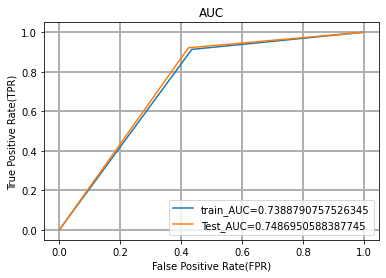

In [61]:
train_fpr,train_tpr,tr_thresholds = roc_curve(y_train,y_pred)
test_fpr,test_tpr,te_thresholds = roc_curve(y_test,y_test_pred)
plt.plot(train_fpr,train_tpr,label = "train_AUC="+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label = "Test_AUC="+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(linestyle='-', linewidth=2)

In [62]:
print("F1 score:",f1_score(y_test,y_test_pred))

F1 score: 0.6956377508707913


**Logistic Regression**

In [ ]:
#ref https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
parameters = {'penalty':['l1', 'l2'], 'C':[0.001,0.01,0.1,1,10],'solver':['liblinear','saga','sag']}
rkf = StratifiedKFold(n_splits=11,random_state=42,shuffle=True)
clf = LogisticRegression(random_state=42)

grid = GridSearchCV(estimator = clf, param_grid = parameters , scoring = 'roc_auc', verbose = 1, n_jobs = -1,cv=rkf)
grid.fit(X_train_bow,y_train)

print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))




Fitting 11 folds for each of 30 candidates, totalling 330 fits
Best Score:0.9828339733593894
Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}


In [28]:
clf = LogisticRegression(C=10,penalty='l2',solver='saga')
clf.fit(X_train_bow,y_train)

y_pred = clf.predict(X_train_bow)
logistic_train_auc = roc_auc_score(y_train,y_pred)
print(logistic_train_auc)

0.945246634285075


In [29]:
y_test_pred = clf.predict(X_test_bow)
logistic_test_auc = roc_auc_score(y_test,y_test_pred)
print(logistic_test_auc)

0.9210989222115137


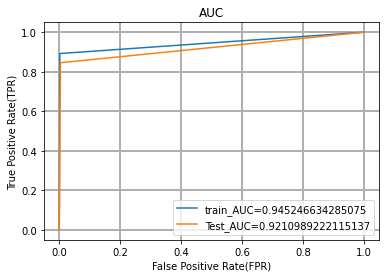

In [30]:
train_fpr,train_tpr,tr_thresholds = roc_curve(y_train,y_pred)
test_fpr,test_tpr,te_thresholds = roc_curve(y_test,y_test_pred)
plt.plot(train_fpr,train_tpr,label = "train_AUC="+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label = "Test_AUC="+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(linestyle='-', linewidth=2)

In [31]:
print("F1-score",f1_score(y_test,y_test_pred))

F1-score 0.9134045077105576


**Naive Bayes Classifier**

In [ ]:
#ref https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
from sklearn.naive_bayes import MultinomialNB
parameters = {'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]}

rkf = StratifiedKFold(n_splits=11,random_state=42,shuffle=True)
clf = MultinomialNB()

grid = GridSearchCV(estimator = clf, param_grid = parameters , scoring = 'roc_auc', verbose = 1, n_jobs = -1,cv=rkf)
grid.fit(X_train_bow,y_train)

print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))

Fitting 11 folds for each of 9 candidates, totalling 99 fits
Best Score:0.9767960672151801
Best Parameters: {'alpha': 0.1}


In [34]:
clf = MultinomialNB(alpha=0.1)
clf.fit(X_train_bow,y_train)

y_pred = clf.predict(X_train_bow)
multinomial_train_auc = roc_auc_score(y_train,y_pred)
print(multinomial_train_auc)

0.983817737943144


In [35]:
y_test_pred = clf.predict(X_test_bow)
multinomial_test_auc = roc_auc_score(y_test,y_test_pred)
print(multinomial_test_auc)

0.9550856597528744


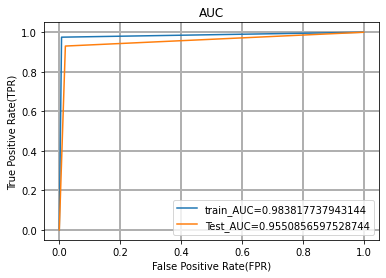

In [36]:
train_fpr,train_tpr,tr_thresholds = roc_curve(y_train,y_pred)
test_fpr,test_tpr,te_thresholds = roc_curve(y_test,y_test_pred)
plt.plot(train_fpr,train_tpr,label = "train_AUC="+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label = "Test_AUC="+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(linestyle='-', linewidth=2)

In [37]:
print("f1 score:",f1_score(y_test,y_test_pred))

f1 score: 0.9469917244464324


**Support Vector Machine**

In [ ]:
#ref = https://scikit-learn.org/stable/modules/svm.html


parameters = {'C':[10**i for i in range(-4,5)],'kernel':['linear','poly','sigmoid','rdf']}

#The instance of SVC
rkf = StratifiedKFold(n_splits=11,random_state=42,shuffle=True)
svc_model = SVC(random_state=42)
#Used GridserachCV for Hyper-parameter
grid = GridSearchCV(estimator = svc_model, param_grid = parameters , scoring = 'roc_auc', verbose = 1, n_jobs = -1,cv=rkf)
grid.fit(X_train_bow,y_train)

print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))


Fitting 11 folds for each of 36 candidates, totalling 396 fits
Best Score:0.9777949865757819
Best Parameters: {'C': 1, 'kernel': 'linear'}


In [40]:
svc_clf = SVC(C = 1, kernel = 'linear')
svc_clf.fit(X_train_bow,y_train)

y_pred = svc_clf.predict(X_train_bow)
svm_train_auc = roc_auc_score(y_train,y_pred)
print(svm_train_auc)

0.9905338584283635


In [41]:
y_test_pred = svc_clf.predict(X_test_bow)
svm_test_auc = roc_auc_score(y_test,y_test_pred)
print(svm_test_auc)

0.9152781489790391


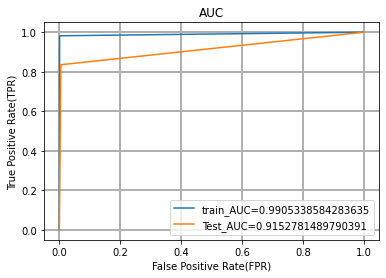

In [42]:
train_fpr,train_tpr,tr_thresholds = roc_curve(y_train,y_pred)
test_fpr,test_tpr,te_thresholds = roc_curve(y_test,y_test_pred)
plt.plot(train_fpr,train_tpr,label = "train_AUC="+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label = "Test_AUC="+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(linestyle='-', linewidth=2)

In [43]:
print("f1-score:",f1_score(y_test,y_test_pred))

f1-score: 0.906145783706527


**Decision Tree Classifier**

In [ ]:
#ref =https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

params =  {'max_depth':[2,3,5,7,9]}

#The instance of SVC
rkf = StratifiedKFold(n_splits=11,random_state=42,shuffle=True)
tree_model = DecisionTreeClassifier(random_state=42)
#Used GridserachCV for Hyper-parameter
grid = GridSearchCV(estimator = tree_model, param_grid = params, scoring = 'roc_auc', verbose = 1, n_jobs = -1,cv=rkf)
grid.fit(X_train_bow,y_train)

print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))





Fitting 11 folds for each of 5 candidates, totalling 55 fits
Best Score:0.8923976951098704
Best Parameters: {'max_depth': 9}


In [44]:
tree_clf = DecisionTreeClassifier(max_depth=9)
tree_clf.fit(X_train_bow,y_train)

y_pred = tree_clf.predict(X_train_bow)
tree_train_auc = roc_auc_score(y_train,y_pred)
print(tree_train_auc)


0.8467260561714017


In [45]:
y_test_pred = tree_clf.predict(X_test_bow)
tree_test_auc = roc_auc_score(y_test,y_test_pred)
print(tree_test_auc)

0.8464668838981442


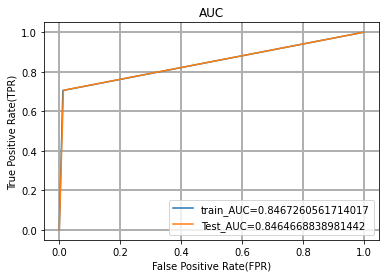

In [46]:
train_fpr,train_tpr,tr_thresholds = roc_curve(y_train,y_pred)
test_fpr,test_tpr,te_thresholds = roc_curve(y_test,y_test_pred)
plt.plot(train_fpr,train_tpr,label = "train_AUC="+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label = "Test_AUC="+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(linestyle='-', linewidth=2)

In [47]:
print("f1-score:",f1_score(y_test,y_test_pred))

f1-score: 0.8168656337312674


**Gradient Boosting Algorithm**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
params = {'n_estimators': [10,20,30,40,50,60],'max_depth':[2,3,5,7]}
rkf = StratifiedKFold(n_splits=11,random_state=42,shuffle=True)
gbdt_model = GradientBoostingClassifier(random_state=42)
#Used GridserachCV for Hyper-parameter
grid = GridSearchCV(estimator = gbdt_model, param_grid = params, scoring = 'roc_auc', verbose = 1, n_jobs = -1,cv=rkf)
grid.fit(X_train_bow,y_train)

print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))


Fitting 11 folds for each of 24 candidates, totalling 264 fits
Best Score:0.9633525175171959
Best Parameters: {'max_depth': 7, 'n_estimators': 60}


In [49]:
gbdt_clf = GradientBoostingClassifier(max_depth = 7, n_estimators = 60)
gbdt_clf.fit(X_train_bow,y_train)

y_pred = gbdt_clf.predict(X_train_bow)
gbdt_train_auc = roc_auc_score(y_train,y_pred)
print(gbdt_train_auc)

0.9089971286045554


In [50]:
y_test_pred = gbdt_clf.predict(X_test_bow)
gbdt_test_auc = roc_auc_score(y_test,y_test_pred)
print(gbdt_test_auc)

0.9064768545889925


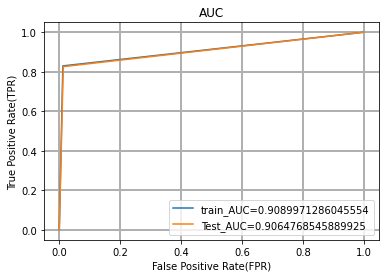

In [51]:
train_fpr,train_tpr,tr_thresholds = roc_curve(y_train,y_pred)
test_fpr,test_tpr,te_thresholds = roc_curve(y_test,y_test_pred)
plt.plot(train_fpr,train_tpr,label = "train_AUC="+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label = "Test_AUC="+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(linestyle='-', linewidth=2)

In [52]:
print("f1-score:",f1_score(y_test,y_test_pred))

f1-score: 0.893748514380794


**Stacking Classifier**

In [53]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [54]:
from mlxtend.classifier import StackingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [63]:
#classifier 1
knn_model = KNeighborsClassifier(n_neighbors = 50)
knn_model.fit(X_train_bow,y_train)

#Classifier 2
model = LogisticRegression(C= 10, penalty = 'l2', solver = 'sag')
model.fit(X_train_bow,y_train)

naive_clf = MultinomialNB(alpha=0.1)
naive_clf.fit(X_train_bow,y_train)

#Classifier 3
svc_clf = SVC(C = 1, kernel = 'linear')
svc_clf.fit(X_train_bow,y_train)

#classifier 4


tree_clf = DecisionTreeClassifier(max_depth = 9)
tree_clf.fit(X_train_bow,y_train)

#classifier 5
gbdt_clf = GradientBoostingClassifier(max_depth = 7, n_estimators = 60)
gbdt_clf.fit(X_train_bow,y_train)


#Stacking Classifer

sclf = StackingClassifier(classifiers=[knn_model,model,naive_clf,svc_clf,tree_clf,gbdt_clf],meta_classifier=model)

#fit the model
sclf.fit(X_train_bow,y_train)

#predict in probabilities

y_pred = sclf.predict(X_train_bow)


In [64]:
train_auc = roc_auc_score(y_train,y_pred)
print(train_auc)

0.9907445151441261


In [65]:
y_test_pred = sclf.predict(X_test_bow)
test_auc = roc_auc_score(y_test,y_test_pred)
print(test_auc)

0.9316264149517168


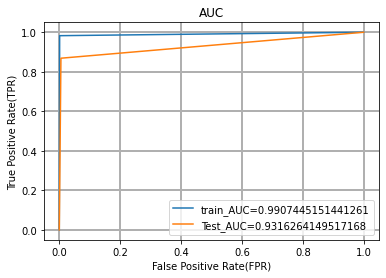

In [66]:
train_fpr,train_tpr,tr_thresholds = roc_curve(y_train,y_pred)
test_fpr,test_tpr,te_thresholds = roc_curve(y_test,y_test_pred)
plt.plot(train_fpr,train_tpr,label = "train_AUC="+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label = "Test_AUC="+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(linestyle='-', linewidth=2)

In [67]:
print("F1 score:",f1_score(y_test,y_test_pred))

F1 score: 0.9251286850725315


### Summary of All Models

In [1]:
from texttable import Texttable
t = Texttable()
t.add_rows([['Model','Hyper-parameter','Train AUC','Test AUC','f1_score'],['Knn_Model',r"{'n_neighbors': 50}",0.73,0.74,0.69],
           ['logistic Regresstion',r"{'C': 10, 'penalty': 'l2', 'solver': 'sag'}",0.94,0.92,0.91],['Support Vector Machine',
           r"{'C': 1, 'kernel': 'linear'}",0.99,0.91,0.90],['Gradient Boosting Algorithm',r"{'max_depth': 7, 'n_estimators': 60}",0.90,0.90,0.89],
            ['Decision_tree Model',r"{'max_depth': 9}",0.84,0.84,0.81],['Naive Bayes',r"{'alpha': 0.1}",.98,0.95,0.94],
            ['Calibrated Model',"--",0.99,0.93,0.92]])

print(t.draw())



+----------------------+---------------------+-----------+----------+----------+
|        Model         |   Hyper-parameter   | Train AUC | Test AUC | f1_score |
+======================+=====================+===========+==========+==========+
| Knn_Model            | {'n_neighbors': 50} | 0.730     | 0.740    | 0.690    |
+----------------------+---------------------+-----------+----------+----------+
| logistic Regresstion | {'C': 10,           | 0.940     | 0.920    | 0.910    |
|                      | 'penalty': 'l2',    |           |          |          |
|                      | 'solver': 'sag'}    |           |          |          |
+----------------------+---------------------+-----------+----------+----------+
| Support Vector       | {'C': 1, 'kernel':  | 0.990     | 0.910    | 0.900    |
| Machine              | 'linear'}           |           |          |          |
+----------------------+---------------------+-----------+----------+----------+
| Gradient Boosting    | {'m

### Observation

We have done text-preprcoessing technique on SQL query and apply bag of words to come with vectorization. 

We have applied 7 Machine learning model such as Knn_Model, Logistic Regression,Support Vector Machine, Gradient Boosting algorithm, Decision_tree model, Naive Bayes Model and calibrated model.

Used AUC as evaluation metrics.

We found Naive Bayes model as best model with AUC =0.95 for this experiment.

